### **ACTIVIDAD 3 **


A partir del dataset analizado en el sprint anterior, se van a entrenar varios modelos de regresión múltiple para predecir la variable charge.

Para ello se plantearán al menos tres escenarios en los cuales se llevará a cabo la fase de preprocesamiento, entrenamiento y evaluación de los resultados obtenidos, haciendo uso del error cuadrático medio como métrica de evaluación.

Tras concluir, se expondrán los resultados obtenidos, indicando cual es el mejor modelo de los entrenados.

Objetivo de la actividad: Aprender a preprocesar, entrenar y validar los resultados obtenidos, haciendo uso del error cuadrático medio como métrica de evaluación.


# **PRIMERA PARTE**
Importacion Data

In [1]:
#Para la actividad configuramos importacion desde kaggle
from google.colab import files
!pip install -q kaggle

In [2]:
#subimos kaggle.json con el cliente
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
#descargamos dataset
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 27.5MB/s]


In [4]:
#movemos fichero json a ubicacion correcta
!mv kaggle.json /root/.kaggle/kaggle.json


In [5]:
#volvemos a cargar el dataset
!kaggle datasets download -d mirichoi0218/insurance

Dataset URL: https://www.kaggle.com/datasets/mirichoi0218/insurance
License(s): DbCL-1.0
insurance.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
# Descomprimir el archivo descargado
!unzip insurance.zip

Archive:  insurance.zip
  inflating: insurance.csv           


In [ ]:
#Mostrar Archivo


# **SEGUNDA PARTE**
Analisis exploratorio

In [15]:
#analisis exploratorio
import pandas as pd

In [22]:
# Cargar el conjunto de datos
df= pd.read_csv('insurance.csv')

In [24]:
# Mostrar las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

Primeras filas del DataFrame:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [25]:
# Mostrar los nombres de las columnas
print("\nNombres de las columnas:")
print(df.columns)


Nombres de las columnas:
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [26]:
# Mostrar el tipo de datos de cada columna
print("\nTipo de datos de cada columna:")
print(df.dtypes)


Tipo de datos de cada columna:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [27]:

# Verificar si hay valores nulos
print("\nValores nulos:")
print(df.isnull().sum())


Valores nulos:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [30]:
#consultamos datos estadisticos generales: numero de elementos, media, desviacion, valor minimo, percentiles
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [31]:
#consultamos el numero de filas y columnas
insurance_data.shape

(1338, 7)

In [32]:
#Resumen exploracion del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


En este anlisis podemos ver que no hay datos nulos, aunque las variables categoricas deben modificarse para un modelo de predicción supervisado:

Variables numéricas (age, bmi, children, charges): Se pueden estandarizar o normalizar.

Variables categóricas (sex, smoker, region): Estas variables necesitan ser convertidas a un formato numérico. Si se quiere hacer un modelo Supervisado o de discriminacion.

**Una pequeña descripcion; **

Análisis de las Características

Podemos notar que;

La columna "age" representa la edad de los individuos en el conjunto de datos. Podemos calcular algunas estadísticas descriptivas básicas para esta característica, como la media, la mediana y la desviación estándar.

    Media de edad: 32.25 años.
    Mediana de edad: 32 años.
    Desviación estándar de edad: 14.05 años.


Sexo (Sex)

La columna "sex" indica el sexo de los individuos en el conjunto de datos. Podemos contar la cantidad de individuos y ver su porcentaje para cada sexo y representarlos en un gráfico de torta.

    Cantidad de individuos masculinos: 676
    Cantidad de individuos femeninos: 662

    Individuos femeninos: 49.48%
    Individuos masculinos: 50.52%


Índice de Masa Corporal (BMI)

El índice de masa corporal (IMC) es una medida que se calcula utilizando la altura y el peso de una persona. Podemos analizar la distribución del IMC en el conjunto de datos y calcular algunas estadísticas descriptivas.

    Media del IMC: 30.66
    Mediana del IMC: 30.4
    Desviación estándar del IMC: 6.1


Número de Hijos (Children)

La columna "children" indica el número de hijos que tienen los individuos en el conjunto de datos. Podemos contar la cantidad de individuos y ver su porcentaje para cada número de hijos y representarlos en un histograma.

    Cantidad de individuos sin hijos: 574
    Cantidad de individuos con 1 hijo: 324
    Cantidad de individuos con 2 hijos: 240
    Cantidad de individuos con 3 hijos: 157
    Cantidad de individuos con 4 hijos: 25
    Cantidad de individuos con 5 hijos: 18

    Sin hijos: 42.90%
    Con 1 hijo: 24.22%
    Con 2 hijos: 17.94%
    Con 3 hijos: 11.74%
    Con 4 hijos: 1.87%
    Con 5 hijos: 1.35%


Fumador (Smoker)

La columna "smoker" indica si los individuos son fumadores o no. Podemos contar la cantidad de fumadores y no fumadores y ver su porcentaje para  en el conjunto de datos y representarlos en un gráfico de torta.

    Cantidad de fumadores: 274
    Cantidad de no fumadores: 1064
    Fumadores: 20.48%
    No fumadores: 79.52%

    
    


Región (Region)

La columna "region" indica la región en la que viven los individuos en el conjunto de datos. Podemos contar la cantidad de individuos y ver su porcentaje para cada región y representarlos en un gráfico de barras.

    Cantidad de individuos en la región southwest: 325
    Cantidad de individuos en la región southeast: 364
    Cantidad de individuos en la región northwest: 325
    Cantidad de individuos en la región northeast: 324

    Southwest: 24.29%
    Southeast: 27.19%
    Northwest: 24.29%
    Northeast: 24.23%


Cargos Médicos (Charges)

La columna "charges" representa los cargos médicos asociados a cada individuo en el conjunto de datos. Podemos calcular algunas estadísticas descriptivas básicas para esta característica, como la media, la mediana y la desviación estándar.

    Media de los cargos médicos: 13270.42
    Mediana de los cargos médicos: 9382.03
    Desviación estándar de los cargos médicos: 12110.01


Conclusiones

En este análisis exploratorio de los datos, vemos las estadísticas descriptivas básicas y representado se podrian representar.Con los porcentajes podriamos hacer una planificación regional, de genero y por familias para la distribución de recursos, análisis de mercado o cualquier estudio.

Es importante tener en cuenta que este análisis exploratorio es solo una introducción pero muy reveladora de los datos.

**Graficacion**

In [62]:
# análisis visual
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import colors

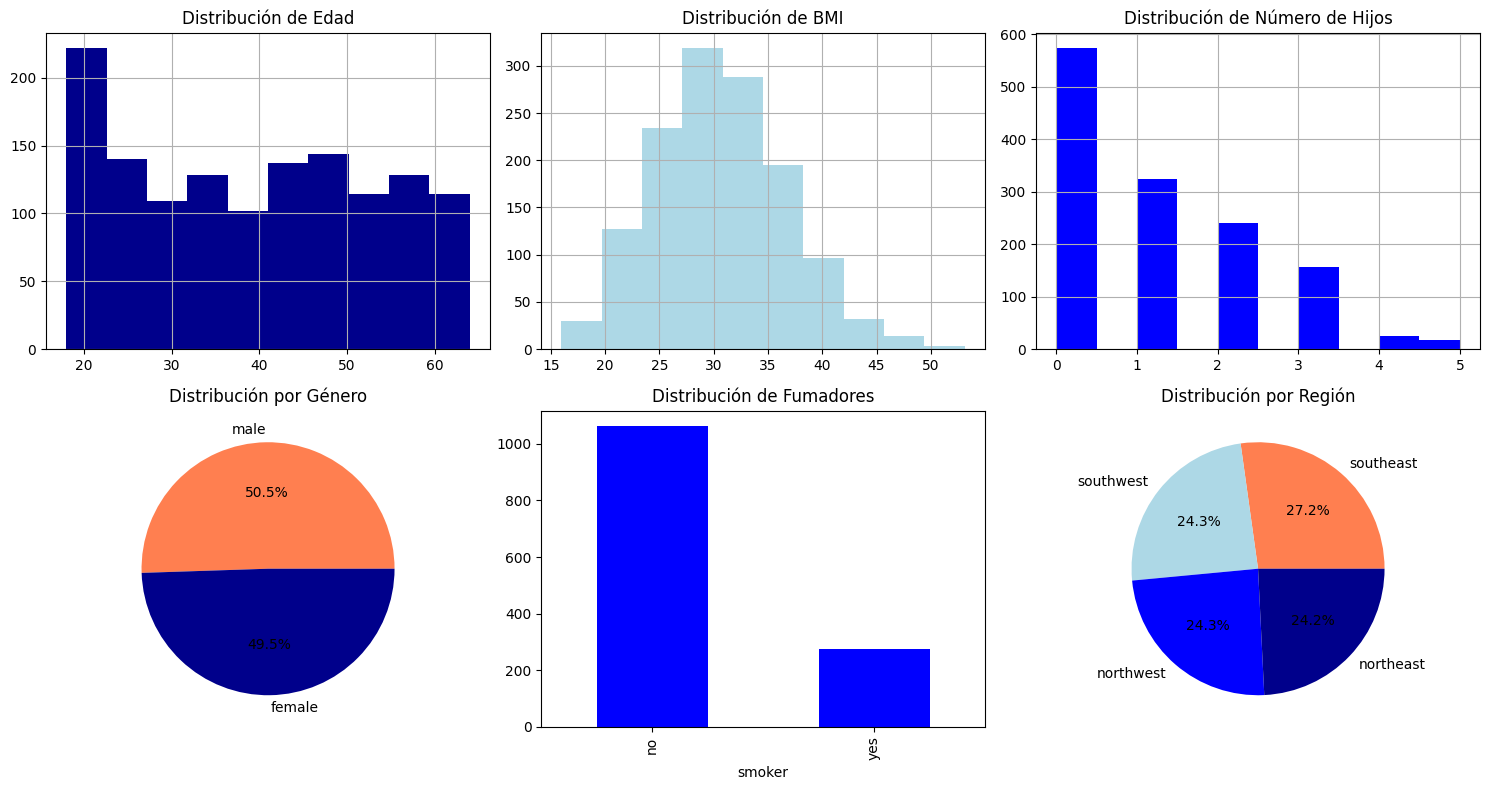

In [73]:


# Visualización de histogramas con nombres
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # Crear subplots de 2 filas y 3 columnas

# Histogramas para cada variable
df['age'].hist(ax=axes[0, 0], color='darkblue')
axes[0, 0].set_title('Distribución de Edad')

df['bmi'].hist(ax=axes[0, 1], color='lightblue')
axes[0, 1].set_title('Distribución de BMI')

df['children'].hist(ax=axes[0, 2], color='blue')
axes[0, 2].set_title('Distribución de Número de Hijos')

# Histogramas para variables categóricas

sex_counts = df['sex'].value_counts()
axes[1, 0].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', colors=['coral', 'darkblue'])
axes[1, 0].set_title('Distribución por Género')

df['smoker'].value_counts().plot(kind='bar', ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Distribución de Fumadores')

region_counts = df['region'].value_counts()
axes[1, 2].pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', colors=['coral', 'lightblue', 'blue', 'darkblue'])
axes[1, 2].set_title('Distribución por Región')
plt.tight_layout()  # Ajustar el espacio entre los subplots
plt.show()



### **TERCERA PARTE **

Entrenamietos de varios modelos de regresión múltiple para predecir la variable charge.
Durante el ejercicio, vamos a realizar distintos modelos aplicando distintos tratamientos de datos para ver como éstos afectan al resultado sobre las métricas.

HIPOTESIS 1: Utilizando sólo las variables numéricas.

Dado que los modelos sólo aceptan variables numéricas, vamos a eliminar todas aquellas variables que no lo son.

Recordamos que las Variables numéricas (age, bmi, children, charges) y las Variables categóricas son (sex, smoker, region)

In [74]:
#Mostramos y Duplicamos la Data
print(df)
df1= df
df2= df
print(df1)
print(df2)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1  

In [75]:
# preparamos el dataset de la hipótesis 1
# borramos las columnas categóricas
categorical_columns = ['sex','smoker', 'region']
df1_hipot1= df1.drop(categorical_columns,axis =1)

In [76]:
# Miramos nuestro DataSet
df1_hipot1.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [77]:
X_hipot1 = df1_hipot1.drop('charges',axis=1) #  variables independientes
y_hipot1 = df1_hipot1['charges'] #  variable depnediente

In [78]:
# preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hipot1_train, X_hipot1_test, y_hipot1_train, y_hipot1_test = train_test_split(X_hipot1, y_hipot1, test_size=0.20, random_state=43)

In [79]:
# Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot1_train, y_hipot1_train)

LinearRegression()

In [80]:
# FASE VALIDACION

# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot1_train)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot1_train = mean_squared_error(y_true = y_hipot1_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TRAIN= ' + str(mse_hipot1_train))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot1_test)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot1_test = mean_squared_error(y_true = y_hipot1_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) TEST= ' + str(mse_hipot1_test))



Error Cuadrático Medio (MSE) TRAIN= 128088522.65077363
Error Cuadrático Medio (MSE) TEST= 132839442.2870192


El error cuadratico medio esta muy alejado de cero luego no es una hipotesis confiable.

**HIPÓTESIS2: **Transformamos las variables categóricas en variables numéricas.

Para ello, utilizaremos una técnica llamada one_hot_enconding que permite transformar en un conjunto de 1 y 0 una variable categórica. Por ejemplo, si tuviéramos una variable denominada color, con los valores Azul, Rojo y Verde, el one_hote_encoding crearía 3 variables color_Azul, color_Rojo, color_Verde con los valores 1 y 0 dependiendo de si el valor de la variable original era azul, rojo o verde

In [90]:
# preparamos el dataset de la hipótesis 2
# vamos a tratar algunas de las variables categoricas con la técnica de one_hot_encoding
categorical_columns_2 = ['sex','smoker', 'region']

In [89]:
#Preparamos el dataset de la hipótesis 2
df2_hipot2 = pd.get_dummies(data = df2, prefix = 'OHE', prefix_sep='_',
               columns = categorical_columns_2,
               drop_first =True,
              dtype='int8')



In [94]:
# miramos nuestro dataSet
df2_hipot2.head()



,age,bmi,children,charges,OHE_male,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [86]:
X_hipot2 = df2_hipot2.drop('charges',axis=1) #  variables independientes
y_hipot2 = df2_hipot2['charges'] #  variable depnediente

# preparamos train data y test data
from sklearn.model_selection import train_test_split
X_hipot2_train, X_hipot2_test, y_hipot2_train, y_hipot2_test = train_test_split(X_hipot2, y_hipot2, test_size=0.20, random_state=43)

In [87]:
#Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot2_train, y_hipot2_train)

LinearRegression()

In [88]:
# FASE VALIDACION

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot2_train)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot2_train = mean_squared_error(y_true = y_hipot2_train, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TRAIN= ' + str(mse_hipot1_train))
print('Error Cuadrático Medio (MSE) HIPO 2 TRAIN= ' + str(mse_hipot2_train))

# predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot2_test)

# calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot2_test = mean_squared_error(y_true = y_hipot2_test, y_pred = prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TEST= ' + str(mse_hipot1_test))
print('Error Cuadrático Medio (MSE) HIPO 2 TEST= ' + str(mse_hipot2_test))



Error Cuadrático Medio (MSE) HIPO 1 TRAIN= 128088522.65077363
Error Cuadrático Medio (MSE) HIPO 2 TRAIN= 34954953.93224391
Error Cuadrático Medio (MSE) HIPO 1 TEST= 132839442.2870192
Error Cuadrático Medio (MSE) HIPO 2 TEST= 43001715.787972376


Aun es muy lejano a cero se prueba otra hipotesis


HIPOTESIS 3: Normalizando todas las variables

In [109]:
# Preparamos el dataset de la hipótesis 3
# Vamos a tratar algunas de las variables categóricas con la técnica de one_hot_encoding
categorical_columns_2 = ['sex', 'smoker', 'region']
numerical_columns_1 = ['age', 'bmi', 'children', 'charges']

In [111]:
# Aplicamos one-hot encoding a las variables categóricas
df3_hipot3 = pd.get_dummies(data=df, prefix='NEW', prefix_sep='_',
                            columns=categorical_columns_2,
                            drop_first=True,
                            dtype='int8')

In [112]:
# miramos nuestro dataSet
df3_hipot3.head()


,age,bmi,children,charges,NEW_male,NEW_yes,NEW_northwest,NEW_southeast,NEW_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [114]:
# Definimos las variables independientes (X) y la variable dependiente (y)
X_hipot3 = df3_hipot3.drop('charges', axis=1)
y_hipot3 = df3_hipot3['charges']



In [121]:
# Scaling Data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Escalado de las variables independientes (X_hipot3)
X_hipot3 = scaler.fit_transform(X_hipot3)

# Escalado de la variable dependiente (y_hipot3)
y_hipot3 = scaler.fit_transform(y_hipot3.reshape(-1, 1)).flatten()

# Ahora X_hipot3 y y_hipot3 están listos para ser utilizados en modelos de machine learning

# Volvemos a transformar nuestra variable en un array de 1xn
y_hipot3=y_hipot3.reshape(1,-1)[0]


In [122]:
# preparamos train data y test data
X_hipot3_train, X_hipot3_test, y_hipot3_train, y_hipot3_test = train_test_split(X_hipot3, y_hipot3, test_size=0.20, random_state=43)

In [123]:
#Regresion lineal
from sklearn.linear_model import LinearRegression
regresion_lineal=LinearRegression()
regresion_lineal.fit(X_hipot3_train, y_hipot3_train)



LinearRegression()

In [128]:
# FASE VALIDACION

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot3_train)

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse_hipot3_train = mean_squared_error(y_true=y_hipot3_train, y_pred=prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TRAIN= ' + str(mse_hipot1_train))
print('Error Cuadrático Medio (MSE) HIPO 2 TRAIN= ' + str(mse_hipot2_train))
print('Error Cuadrático Medio (MSE) HIPO 3 TRAIN= ' + str(mse_hipot3_train))

# Predecimos los valores y para los datos usados en el test
prediccion_test = regresion_lineal.predict(X_hipot3_test)

# Calculamos el Error Cuadrático Medio (MSE) para el conjunto de test
mse_hipot3_test = mean_squared_error(y_true=y_hipot3_test, y_pred=prediccion_test)
print('Error Cuadrático Medio (MSE) HIPO 1 TEST= ' + str(mse_hipot1_test))
print('Error Cuadrático Medio (MSE) HIPO 2 TEST= ' + str(mse_hipot2_test))
print('Error Cuadrático Medio (MSE) HIPO 3 TEST= ' + str(mse_hipot3_test))


Error Cuadrático Medio (MSE) HIPO 1 TRAIN= 128088522.65077363
Error Cuadrático Medio (MSE) HIPO 2 TRAIN= 34954953.93224391
Error Cuadrático Medio (MSE) HIPO 3 TRAIN= 0.2385307358980625
Error Cuadrático Medio (MSE) HIPO 1 TEST= 132839442.2870192
Error Cuadrático Medio (MSE) HIPO 2 TEST= 43001715.787972376
Error Cuadrático Medio (MSE) HIPO 3 TEST= 0.29344140838139343


In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Definir las variables categóricas y numéricas
categorical_columns_2 = ['sex', 'smoker', 'region']
numerical_columns_1 = ['age', 'bmi', 'children', 'charges']

# Aplicar one-hot encoding a las variables categóricas y eliminar columnas innecesarias
df_hipot4 = pd.get_dummies(data=df, prefix='NEW', prefix_sep='_',
                           columns=categorical_columns_2,
                           drop_first=True,
                           dtype='int8')

# Escalar las variables numéricas y la variable dependiente 'charges' usando StandardScaler
scaler = StandardScaler()
df_hipot4[numerical_columns_1[:-1]] = scaler.fit_transform(df_hipot4[numerical_columns_1[:-1]])
df_hipot4['charges'] = scaler.fit_transform(df_hipot4['charges'].values.reshape(-1, 1)).flatten()

# Separar las variables independientes (X_hipot4) y la variable dependiente (y_hipot4)
X_hipot4 = df_hipot4.drop('charges', axis=1)
y_hipot4 = df_hipot4['charges']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_hipot4_train, X_hipot4_test, y_hipot4_train, y_hipot4_test = train_test_split(X_hipot4, y_hipot4, test_size=0.20, random_state=43)

# Entrenar un modelo de regresión lineal
regresion_lineal = LinearRegression()
regresion_lineal.fit(X_hipot4_train, y_hipot4_train)

# FASE DE VALIDACIÓN


# Predecir los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(X_hipot4_train)

# Calcular el Error Cuadrático Medio (MSE) en el conjunto de entrenamiento
mse_hipot4_train = mean_squared_error(y_true=y_hipot4_train, y_pred=prediccion_entrenamiento)
print('Error Cuadrático Medio (MSE) HIPO 1 TRAIN= ' + str(mse_hipot1_train))
print('Error Cuadrático Medio (MSE) HIPO 2 TRAIN= ' + str(mse_hipot2_train))
print('Error Cuadrático Medio (MSE) HIPO 3 TRAIN= ' + str(mse_hipot3_train))
print('Error Cuadrático Medio (MSE) HIPO 4 TRAIN= ' + str(mse_hipot4_train))

# Predecir los valores y para los datos usados en el conjunto de prueba
prediccion_test = regresion_lineal.predict(X_hipot4_test)

# Calcular el Error Cuadrático Medio (MSE) en el conjunto de prueba
mse_hipot4_test = mean_squared_error(y_true=y_hipot4_test, y_pred=prediccion_test)
print('Error Cuadrático Medio (MSE) HIPO 1 TEST= ' + str(mse_hipot1_test))
print('Error Cuadrático Medio (MSE) HIPO 2 TEST= ' + str(mse_hipot2_test))
print('Error Cuadrático Medio (MSE) HIPO 3 TEST= ' + str(mse_hipot3_test))
print('Error Cuadrático Medio (MSE) HIPO 4 TEST= ' + str(mse_hipot4_test))



Error Cuadrático Medio (MSE) HIPO 1 TRAIN= 128088522.65077363
Error Cuadrático Medio (MSE) HIPO 2 TRAIN= 34954953.93224391
Error Cuadrático Medio (MSE) HIPO 3 TRAIN= 0.2385307358980625
Error Cuadrático Medio (MSE) HIPO 4 TRAIN= 0.23853073589806242
Error Cuadrático Medio (MSE) HIPO 1 TEST= 132839442.2870192
Error Cuadrático Medio (MSE) HIPO 2 TEST= 43001715.787972376
Error Cuadrático Medio (MSE) HIPO 3 TEST= 0.29344140838139343
Error Cuadrático Medio (MSE) HIPO 4 TEST= 0.2934414083813933


## ANALISIS DE RESULTADOS

Análisis de resultados:

Hipótesis 1 muestra un MSE elevado tanto en entrenamiento como en prueba, entonces se descarta.

Hipótesis 2 mejora significativamente respecto a la primera hipótesis, tanto en el MSE de entrenamiento como en el de prueba. Pero esta alejado de cero por lo mismo se descarta.

Hipótesis 3 muestra un MSE muy cercano a cero, tanto en entrenamiento como en prueba. Este resultado sugiere que la combinación de one-hot encoding y normalización de las variables ha optimizado considerablemente el modelo.

Hipótesis 4 en el conjunto de entrenamiento es de aproximadamente 0.2385, y en el conjunto de prueba es de aproximadamente 0.2934. Igual resultado que la Hipotesis 3 el modelo tiene un rendimiento pero es innecesario


Conclusión:

Basándonos en los errores cuadráticos medios obtenidos, la Hipótesis 3 es la mejor opción. Esta hipótesis logro un MSE bajo. Lo que nos garantiza que se pueden predecir los cargos médicos con precision en este conjunto de datos, se recomienda utilizar la Hipótesis 3 como el modelo preferido.

La Hipótesis 4, tambien predice los (charges) con la misma precision que la H3 utilizando regresión lineal. Sin embargo es irrelevante para el objetivo de este ejercicio.